# Analyzing the term "SILVER"

## Introduction
According to the [Investopedia](https://www.investopedia.com/terms/s/silver.asp):
>The term silver refers to a precious metal commonly used in the production of jewelry, coins, electronics, and photography. It has the highest electrical conductivity of any metal and is, therefore, a highly valuable substance.

>Silver is valued both as an industrial metal and as a precious metal. It is used in jewelry, electronics, and photography. Many investors use it as a safe haven in times of economic turmoil and sometimes as a hedge against inflation.

---
## Table of Contents:
+ General Analisys
  1. Term Usages per subreddit
  2. Up Vote Ration in each subreddit
  3. Numer of posts related to the term over time
  4. Comparison between close price and number of posts 
+ Sentiment Analisys
  1. Overall distribution of sentiments
  2. Sentiment per subReddit
  3. Mean awards and upVotes
  4. Sentiment over time
  5. Sentiment and the stock market

### Loading dataset

In [1]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///db/reddit_financial.db")
df = pd.read_sql_query(
    "SELECT * FROM reddit_data WHERE title LIKE '%SILVER%' OR selftext LIKE '%SILVER%'",
    con=engine,
    parse_dates=[
        'created',
        'retrieved',
        'edited',
    ],
    index_col = "id"
)

In [2]:
df.head()

,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,is_self,...,num_comments,num_crossposts,selftext,thumbnail,shortlink,subReddit,SentimentAFINN_body,SentimentAFINN_class_body,SentimentAFINN_title,SentimentAFINN_class_title
id,,,,,,,,,,,,,,,,,,,,,
l69fp5,No_River_8068,2021-01-27 17:18:26,2021-02-28 16:51:31,1970-01-01 00:00:00,0,0,0,0,0,1,...,4,0,[,self,https://redd.it/l69fp5,gme,0.0,neutral,0.0,neutral
l6aqwh,cbc65,2021-01-27 18:11:17,2021-02-28 16:51:31,1970-01-01 00:00:00,0,0,0,0,0,1,...,6,0,gold silver perennially short bank govt etc ac...,self,https://redd.it/l6aqwh,gme,1.0,positive,0.0,neutral
l8tvp9,Paybacktime123,2021-01-30 19:45:41,2021-02-28 16:52:24,1970-01-01 00:00:00,0,0,0,0,0,1,...,3,0,silver shorted market world bank illegal short...,self,https://redd.it/l8tvp9,gme,-6.0,negative,-3.0,negative
l8vm6b,Paybacktime123,2021-01-30 21:01:53,2021-02-28 16:52:24,1970-01-01 00:00:00,0,0,0,0,0,1,...,7,0,silver illegally short market world let start ...,self,https://redd.it/l8vm6b,gme,-6.0,negative,-3.0,negative
l9fho1,visionridge,2021-01-31 16:17:46,2021-02-28 16:52:29,2021-01-31 17:04:12,0,0,0,0,0,1,...,5,0,note try post [ r wallstreetbet ] bot kill ins...,self,https://redd.it/l9fho1,gme,53.0,positive,2.0,positive


## General Analisys
In this first part, we are going to analyze quantitative data related to the term.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Term Usages per subreddit

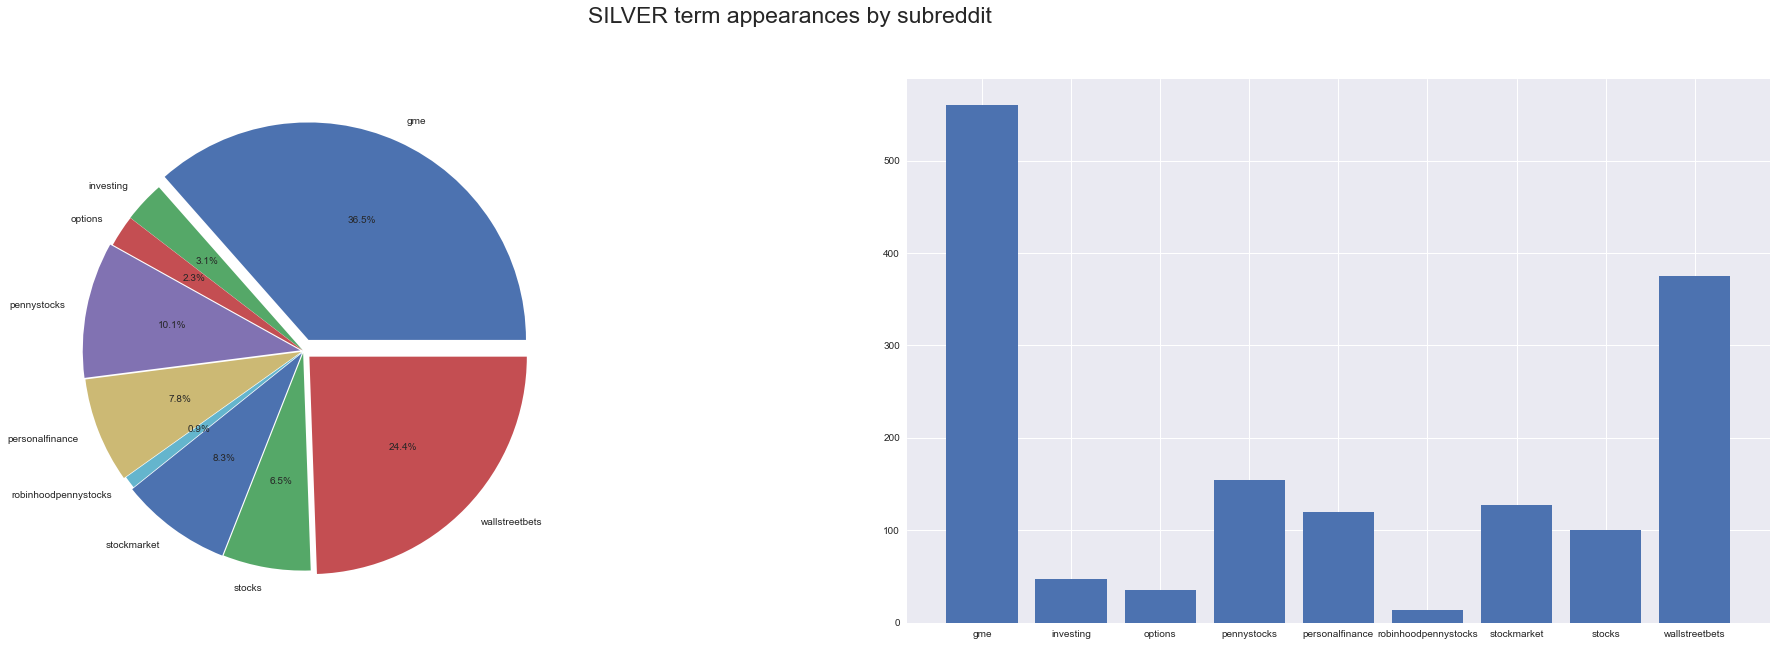

In [4]:
#Number of term usages in each subreddit
subreddits = df.subReddit.unique()
subreddits_count = []
explode = []
for key in subreddits:
    size = len(df[df["subReddit"] == key])
    subreddits_count.append(size)
    explode.append(size/10000)

#Plotting
plt.style.use('seaborn')

fig, axs = plt.subplots(1,2,figsize=(34,10))
fig.suptitle("SILVER term appearances by subreddit",size=23)

axs[0].pie(subreddits_count,labels=subreddits,autopct='%1.1f%%',explode=explode)
axs[1].bar(subreddits,subreddits_count)

plt.show()

### Up Vote Ration in each subreddit

Text(0.5, 1.0, 'Up Vote ratio in each subreddit')

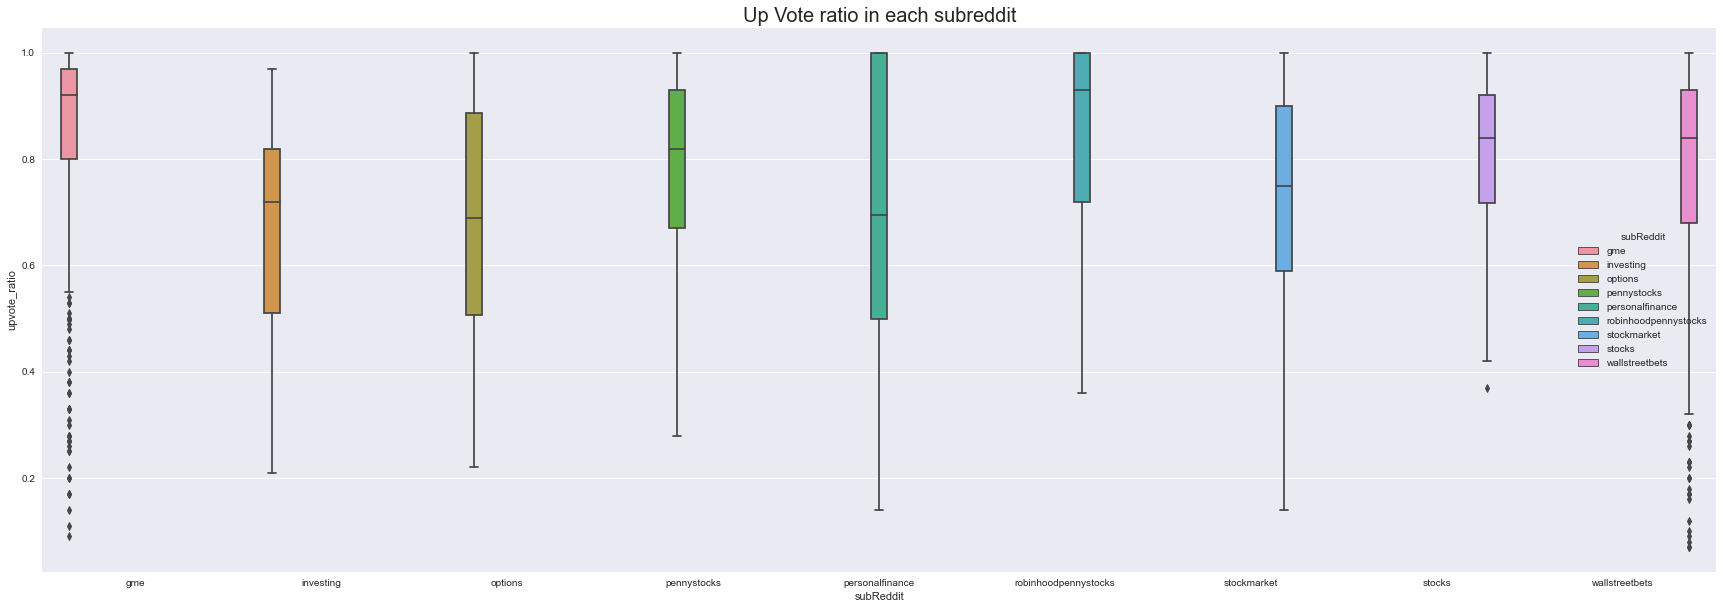

In [5]:
#Up Vote ratio in each subreddit
plt.figure(figsize=(30,10))
sns.boxplot(data=df,x="subReddit",y='upvote_ratio',hue="subReddit")
plt.title("Up Vote ratio in each subreddit",size=20)

#### Numer of posts related to the term over time

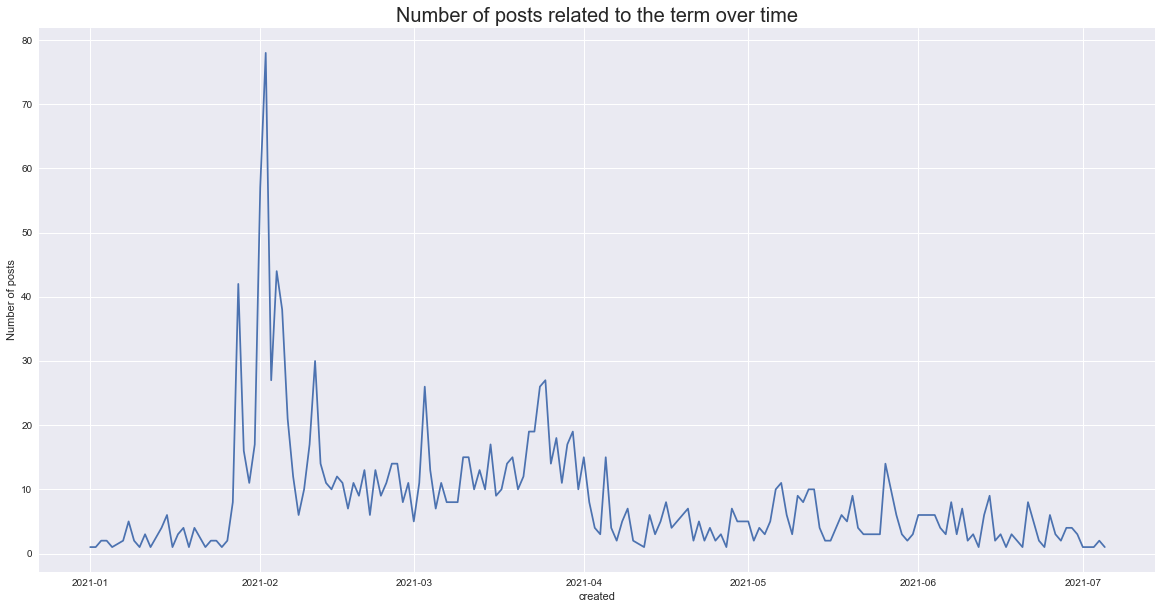

In [7]:
#Occorencies over time

#Cleaning timestamp to achieve a better grouping
df['created'] = pd.to_datetime(df['created']).dt.normalize()


posts_byData = df.groupby('created').count()

plt.figure(figsize=(20,10))
sns.lineplot(data=posts_byData,x="created",y="retrieved")
plt.title("Number of posts related to the term over time",size=20)
plt.ylabel("Number of posts")
plt.show()

In [7]:
posts_byData.head()

,id,author,retrieved,edited,pinned,archived,locked,removed,deleted,is_self,...,num_comments,num_crossposts,selftext,thumbnail,shortlink,subReddit,SentimentAFINN_body,SentimentAFINN_class_body,SentimentAFINN_title,SentimentAFINN_class_title
created,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2021-01-02,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2021-01-03,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2021-01-04,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2021-01-05,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
#Comparing to the stock-market data
import yfinance as yf

start_date = min(df.created)
end_date = max(df.created)

#Using yahoo API
silverDATA = yf.download('SI=F', start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed


#### Comparison between close price and number of posts 

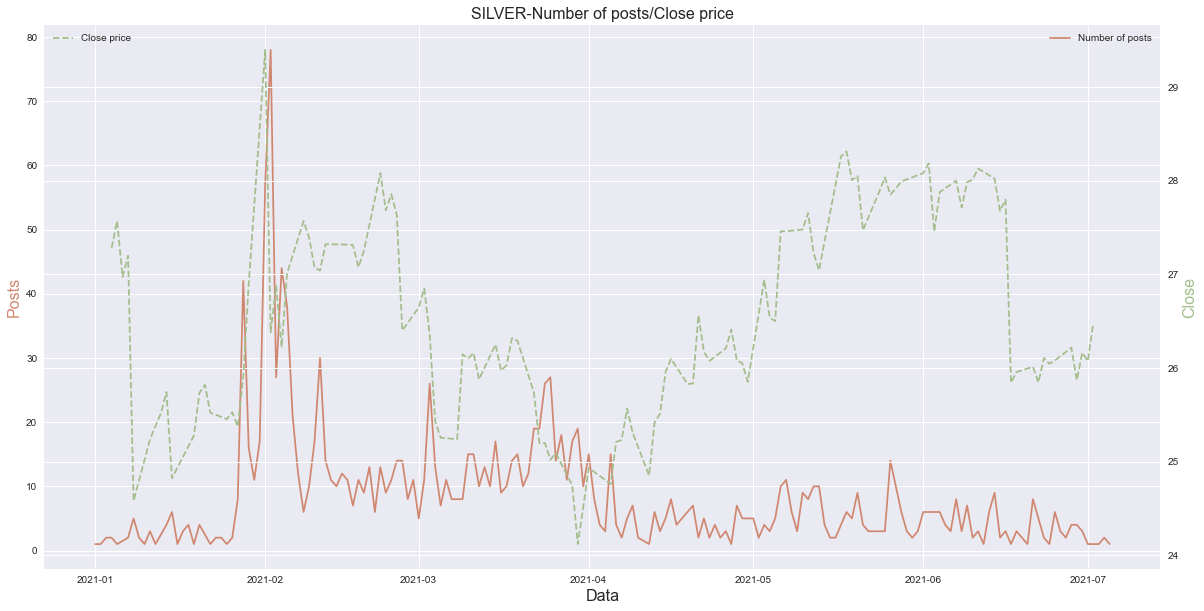

In [9]:
#Comparing close price

fig, ax1 = plt.subplots(figsize=(20,10))

#First Graph
ax1.set_title('SILVER-Number of posts/Close price', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Posts', fontsize=16,color="#D08770")

ax1 = sns.lineplot(data=posts_byData,x="created",y="retrieved",color="#D08770",label="Number of posts")
ax1.tick_params(axis='y')

#Second Graph
ax2 = ax1.twinx()

ax2.set_ylabel('Close', fontsize=16,color="#A3BE8C")
ax2 = sns.lineplot(data=silverDATA,x="Date",y="Close",label="Close price",color="#A3BE8C")
ax2.tick_params(axis='y')
ax2.lines[0].set_linestyle("--")

#Display
plt.legend(loc='upper left')
plt.show()




## Sentiment Analysis
The AFFIN library was used to both analyze and classify all posts and titles. 
In this next topic, we are going to analyze this data.

### Overall distribution of sentiments

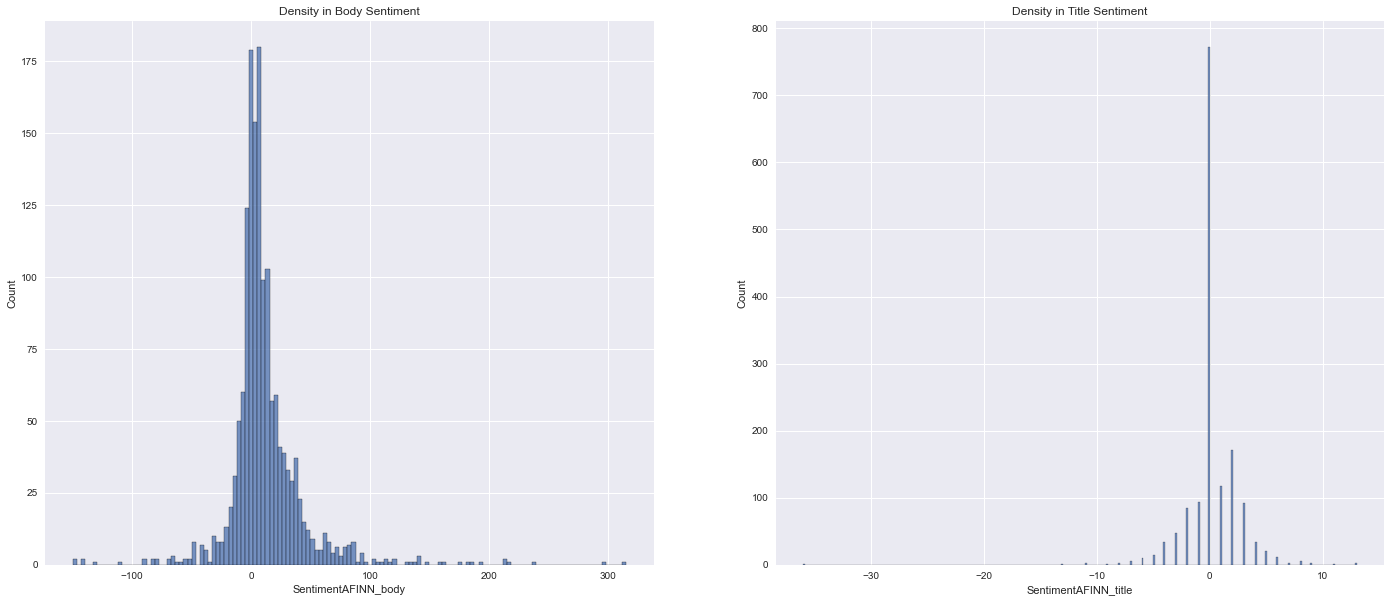

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(24,10))
sns.histplot(df.SentimentAFINN_body, label = 'polarity', ax=axs[0]);
sns.histplot(df.SentimentAFINN_title, label = 'polarity', ax=axs[1]);
axs[0].title.set_text('Density in Body Sentiment');
axs[1].title.set_text('Density in Title Sentiment');
plt.show()

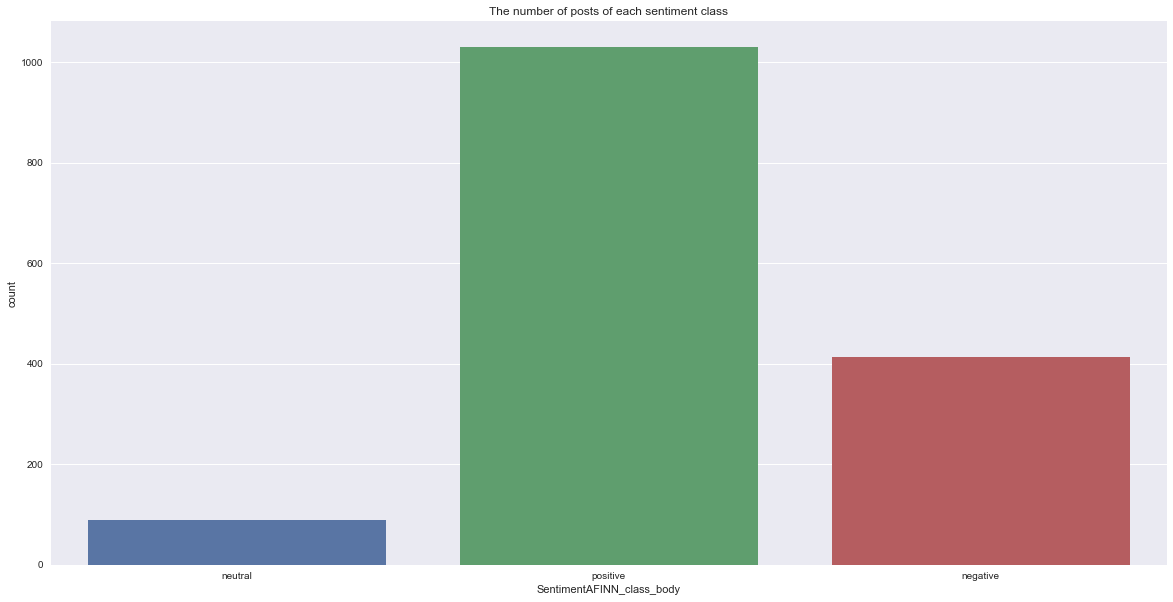

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x='SentimentAFINN_class_body', data=df);
plt.title("The number of posts of each sentiment class")
plt.show()

### Sentiment per subReddit

Text(0.5, 1.0, 'Post Sentiment per subReddit')

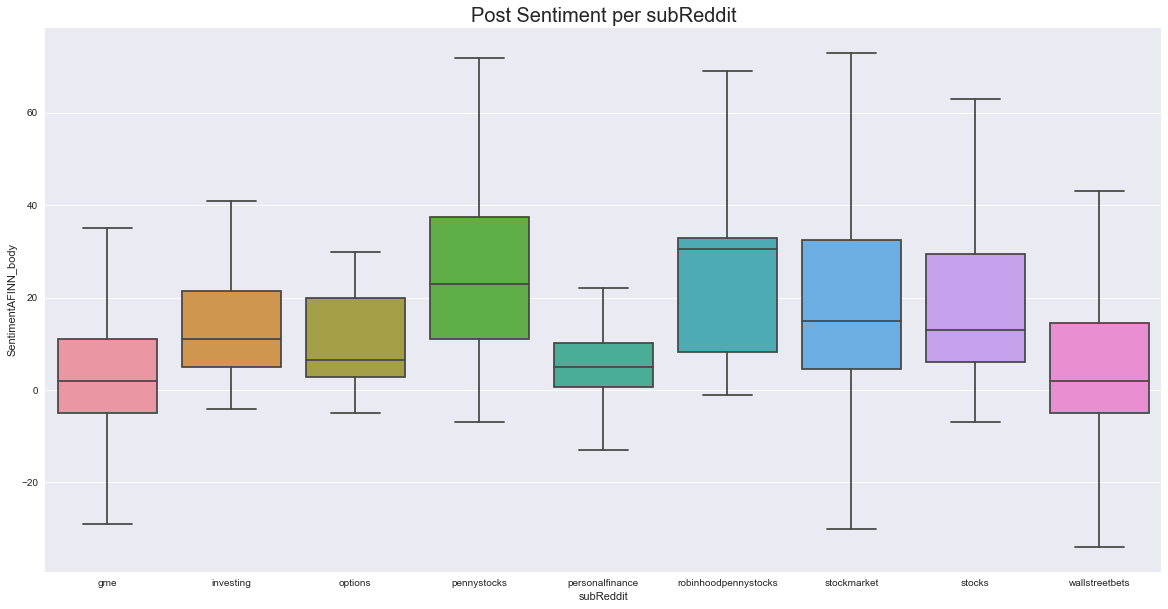

In [50]:
plt.figure(figsize=(20,10))
sns.boxplot(x="subReddit",y="SentimentAFINN_body",data=df, showfliers = False)
plt.title("Post Sentiment per subReddit",size=20)

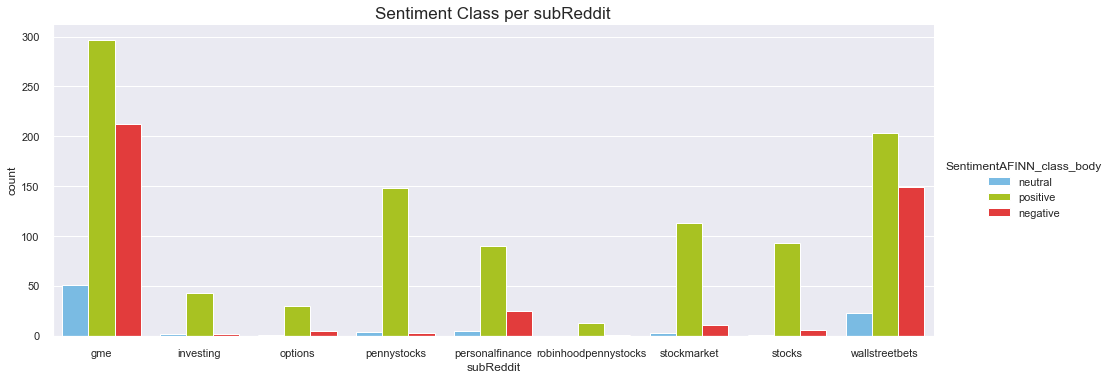

In [63]:
sns.catplot(x="subReddit", hue="SentimentAFINN_class_body", data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"}, aspect=21.7/8.27)
plt.title("Sentiment Class per subReddit",size=17)
plt.show()

### Mean awards and upVotes

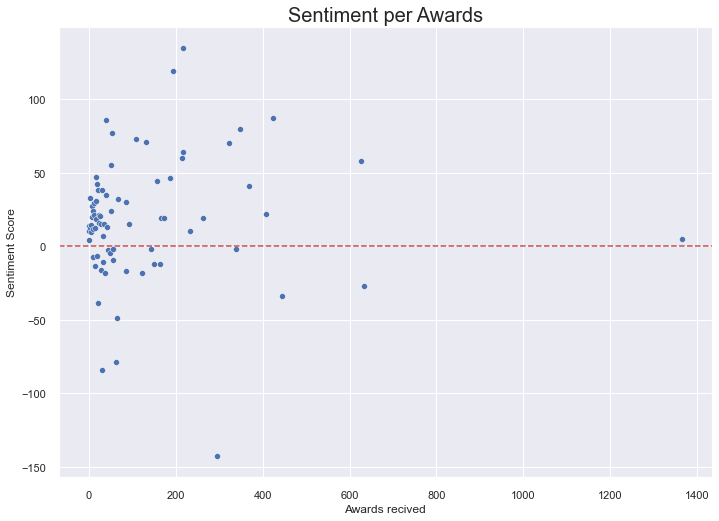

In [75]:
mean_TotalAwards = df.groupby('total_awards_received').mean()
sns.scatterplot(x=mean_TotalAwards.index, y="SentimentAFINN_body", data=mean_TotalAwards)
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Sentiment per Awards",size=20)
plt.xlabel("Awards recived")
plt.ylabel("Sentiment Score")
plt.show()

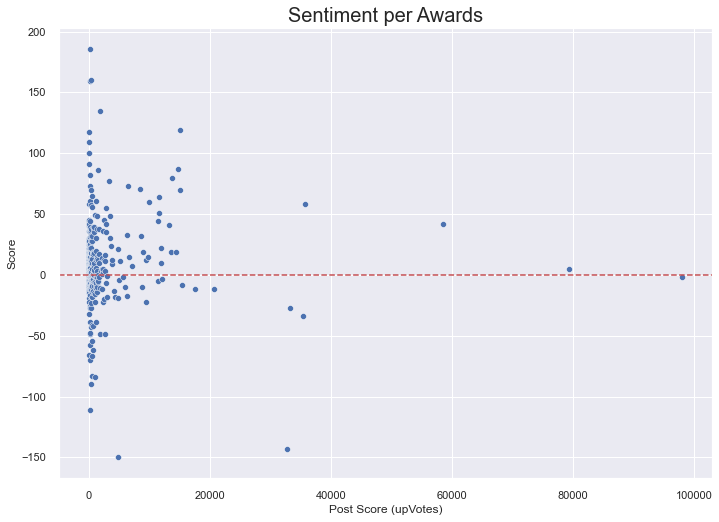

In [77]:
mean_TotalAwards = df.groupby('score').mean()
sns.scatterplot(x=mean_TotalAwards.index, y="SentimentAFINN_body", data=mean_TotalAwards)
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Sentiment per Awards",size=20)
plt.xlabel("Post Score (upVotes)")
plt.ylabel("Score")
plt.show()

### Sentiment over time 

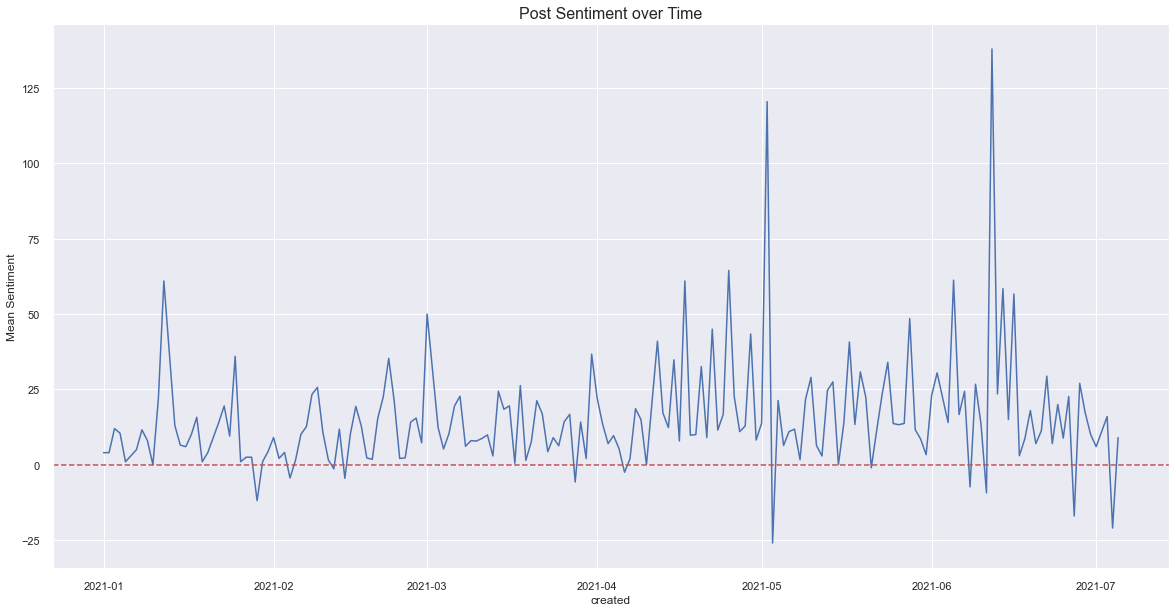

In [90]:
plt.figure(figsize=(20,10))
mean_sentiments = df.groupby('created').mean()
sns.lineplot(data=mean_sentiments,x="created",y="SentimentAFINN_body")
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Post Sentiment over Time",size=16)
plt.ylabel("Mean Sentiment")
plt.show()


In [79]:
df.columns

Index(['id', 'author', 'created', 'retrieved', 'edited', 'pinned', 'archived',
       'locked', 'removed', 'deleted', 'is_self', 'is_video',
       'is_original_content', 'title', 'link_flair_text', 'upvote_ratio',
       'score', 'gilded', 'total_awards_received', 'num_comments',
       'num_crossposts', 'selftext', 'thumbnail', 'shortlink', 'subReddit',
       'SentimentAFINN_body', 'SentimentAFINN_class_body',
       'SentimentAFINN_title', 'SentimentAFINN_class_title'],
      dtype='object')

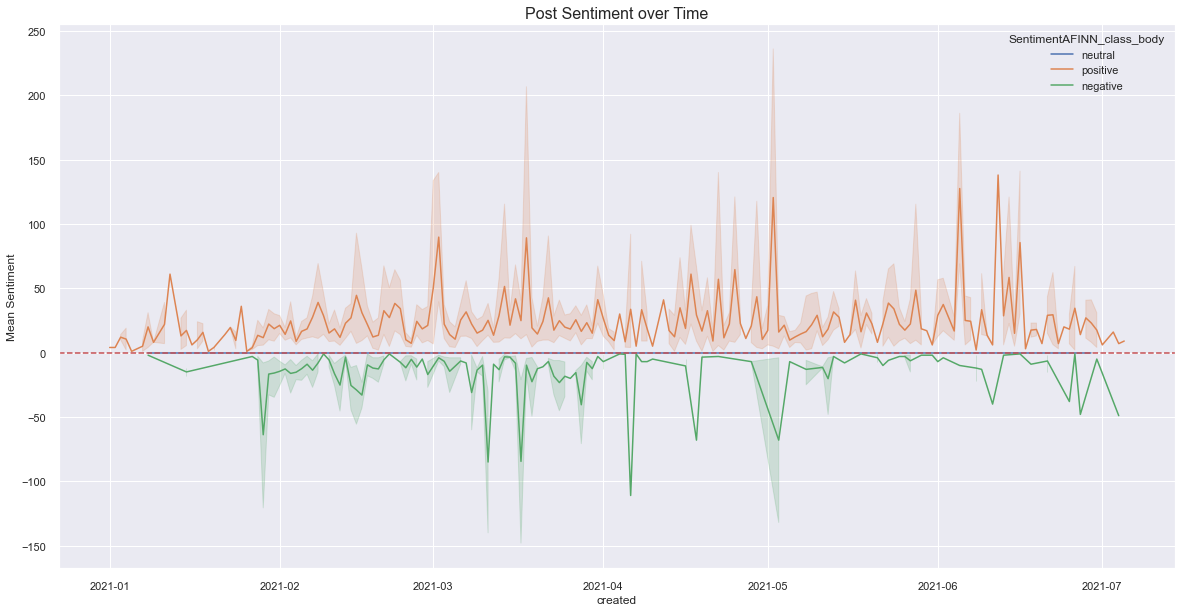

In [92]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="created",y="SentimentAFINN_body",hue="SentimentAFINN_class_body")
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Post Sentiment over Time",size=16)
plt.ylabel("Mean Sentiment")
plt.show()


### Sentiment and the stock market

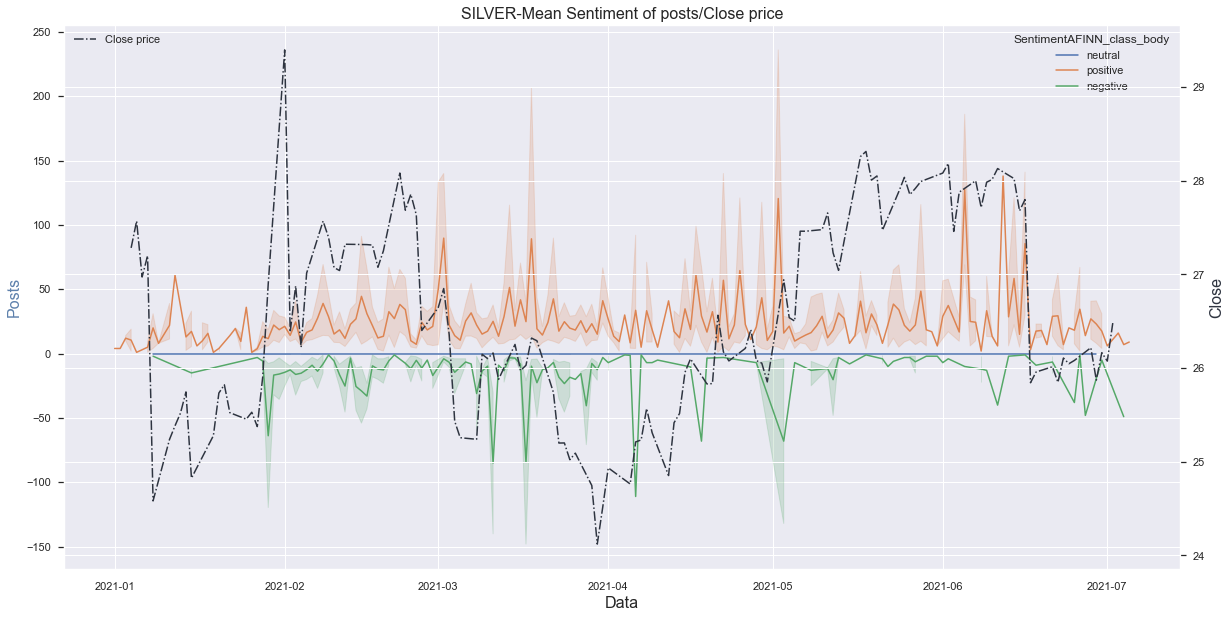

In [113]:
#Comparing close price

fig, ax1 = plt.subplots(figsize=(20,10))

#First Graph
ax1.set_title('SILVER-Mean Sentiment of posts/Close price', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Posts', fontsize=16,color="#5E81AC")

ax1 = sns.lineplot(data=df,x="created",y="SentimentAFINN_body",hue="SentimentAFINN_class_body")
ax1.tick_params(axis='y')

#Second Graph
ax2 = ax1.twinx()

ax2.set_ylabel('Close', fontsize=16,color="#2E3440")
ax2 = sns.lineplot(data=silverDATA,x="Date",y="Close",label="Close price",color="#2E3440")
ax2.tick_params(axis='y')
ax2.lines[0].set_linestyle("dashdot")

#Display
plt.legend(loc='upper left')
plt.show()

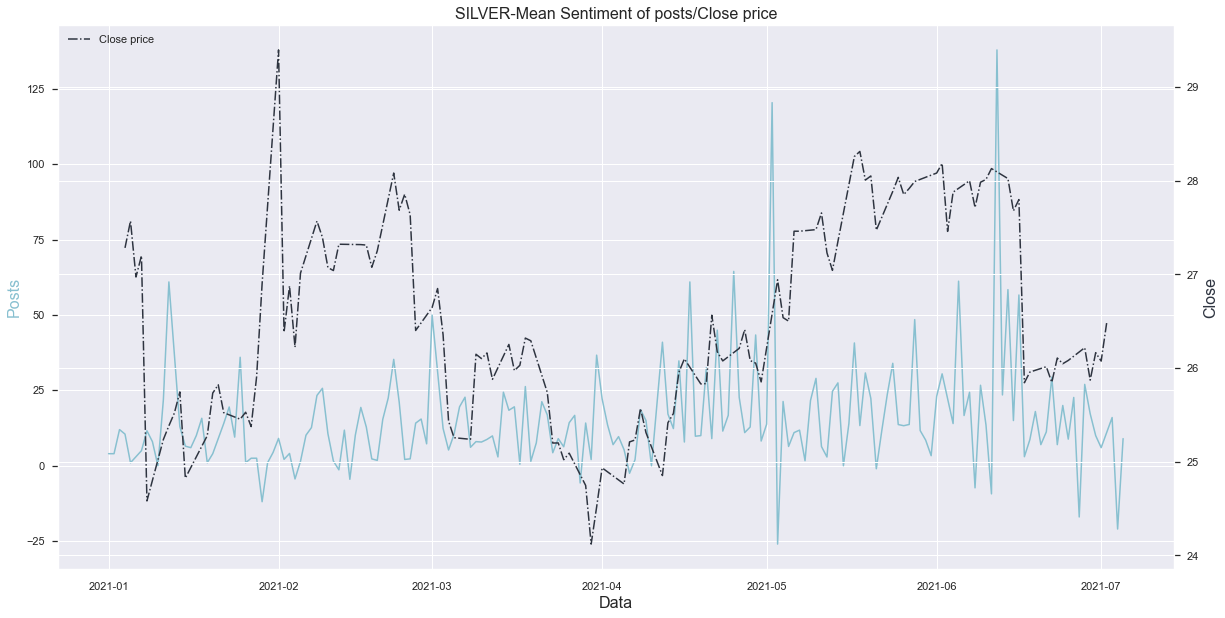

In [115]:
#Comparing close price

fig, ax1 = plt.subplots(figsize=(20,10))

#First Graph
ax1.set_title('SILVER-Mean Sentiment of posts/Close price', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Posts', fontsize=16,color="#88C0D0")

ax1 = sns.lineplot(data=mean_sentiments,x="created",y="SentimentAFINN_body",color="#88C0D0")
ax1.tick_params(axis='y')

#Second Graph
ax2 = ax1.twinx()

ax2.set_ylabel('Close', fontsize=16,color="#2E3440")
ax2 = sns.lineplot(data=silverDATA,x="Date",y="Close",label="Close price",color="#2E3440")
ax2.tick_params(axis='y')
ax2.lines[0].set_linestyle("dashdot")

#Display
plt.legend(loc='upper left')
plt.show()